<a href="https://colab.research.google.com/github/PrishaAggarwal/Machine_Learning_Assignments/blob/main/ML_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Assignment_7
#Q1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

In [ ]:
#Q1
#Part a

# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", names=["label", "text"])

print(df.head())
print(df.label.value_counts())

# Convert labels: spam=1, ham=0
df['label'] = df['label'].map({'ham':0, 'spam':1})

# Preprocessing already handled internally via TF-IDF
# Lowercase + remove punctuation + remove stopwords happens in TF-IDF

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
X = tfidf.fit_transform(df['text'])
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape:", X_train.shape, X_test.shape)

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64
Shape: (4457, 8444) (1115, 8444)


In [ ]:
#Q1
#Part b

stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)

y_pred_train = stump.predict(X_train)
y_pred_test = stump.predict(X_test)

print("Decision Stump Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Decision Stump Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test))

print("\nReason why stump is weak: It cannot separate complex text features due to single split.")

Decision Stump Train Accuracy: 0.8909580435270361
Decision Stump Test Accuracy: 0.8905829596412556

Confusion Matrix (Test):
 [[965   1]
 [121  28]]

Reason why stump is weak: It cannot separate complex text features due to single split.


In [ ]:
#Q1
#Part c

T = 15  # number of boosting rounds

n = X_train.shape[0]
weights = np.ones(n) / n

alphas = []
weighted_errors = []
stumps = []

for t in range(T):
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(X_train, y_train, sample_weight=weights)

    stump_pred = stump.predict(X_train)
    misclassified = (stump_pred != y_train).astype(int)

    error = np.sum(weights * misclassified)
    error = max(error, 1e-10)

    alpha = 0.5 * np.log((1 - error) / error)

    weights = weights * np.exp(alpha * misclassified)
    weights = weights / np.sum(weights)

    stumps.append(stump)
    alphas.append(alpha)
    weighted_errors.append(error)

    print(f"Iteration {t+1}: Error={error:.4f}, Alpha={alpha:.4f}")

Iteration 1: Error=0.1090, Alpha=1.0503
Iteration 2: Error=0.2323, Alpha=0.5978
Iteration 3: Error=0.3164, Alpha=0.3851
Iteration 4: Error=0.4059, Alpha=0.1905
Iteration 5: Error=0.4449, Alpha=0.1107
Iteration 6: Error=0.4662, Alpha=0.0677
Iteration 7: Error=0.4525, Alpha=0.0954
Iteration 8: Error=0.4647, Alpha=0.0707
Iteration 9: Error=0.4605, Alpha=0.0791
Iteration 10: Error=0.4503, Alpha=0.0997
Iteration 11: Error=0.4594, Alpha=0.0813
Iteration 12: Error=0.4603, Alpha=0.0796
Iteration 13: Error=0.4623, Alpha=0.0755
Iteration 14: Error=0.4641, Alpha=0.0719
Iteration 15: Error=0.4651, Alpha=0.0700


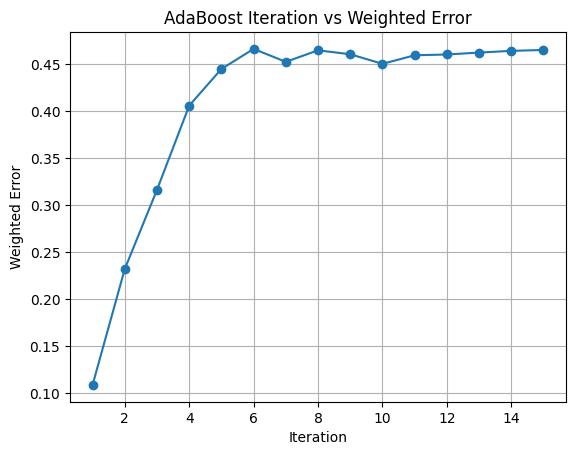

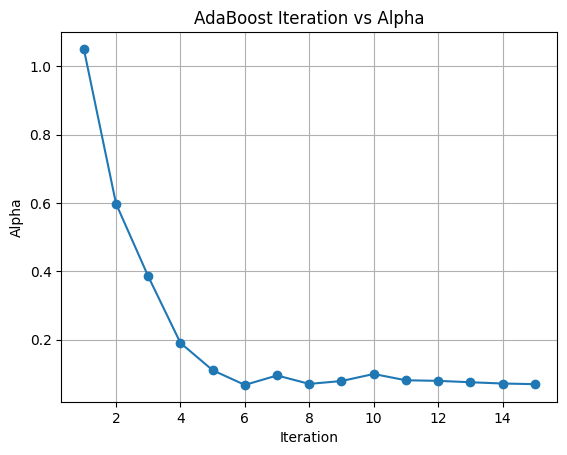

Manual AdaBoost Train Acc: 0.13417096701817366
Manual AdaBoost Test Acc: 0.1336322869955157

Confusion Matrix (Manual AdaBoost):
 [[  0 966]
 [  0 149]]


In [ ]:
plt.plot(range(1, T+1), weighted_errors, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Weighted Error")
plt.title("AdaBoost Iteration vs Weighted Error")
plt.grid()
plt.show()

plt.plot(range(1, T+1), alphas, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Alpha")
plt.title("AdaBoost Iteration vs Alpha")
plt.grid()
plt.show()

# Predict using all stumps
stump_preds_test = np.array([alpha * stump.predict(X_test)
                             for stump, alpha in zip(stumps, alphas)])
y_pred_manual = np.sign(np.sum(stump_preds_test, axis=0))
y_pred_manual = (y_pred_manual > 0).astype(int)

print("Manual AdaBoost Train Acc:", accuracy_score(y_train, (np.sign(np.sum(
    np.array([alpha * s.predict(X_train) for s, alpha in zip(stumps, alphas)]), axis=0)) > 0)))
print("Manual AdaBoost Test Acc:", accuracy_score(y_test, y_pred_manual))

print("\nConfusion Matrix (Manual AdaBoost):\n", confusion_matrix(y_test, y_pred_manual))

In [ ]:
#Q1
#Part d

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("Sklearn AdaBoost Train Acc:", accuracy_score(y_train, ada.predict(X_train)))
print("Sklearn AdaBoost Test Acc:", accuracy_score(y_test, y_pred_ada))

print("\nConfusion Matrix (Sklearn AdaBoost):\n", confusion_matrix(y_test, y_pred_ada))



Sklearn AdaBoost Train Acc: 0.9187794480592326
Sklearn AdaBoost Test Acc: 0.9219730941704036

Confusion Matrix (Sklearn AdaBoost):
 [[965   1]
 [ 86  63]]


In [ ]:
print("Manual AdaBoost Test Accuracy:", accuracy_score(y_test, y_pred_manual))
print("Sklearn AdaBoost Test Accuracy:", accuracy_score(y_test, y_pred_ada))

print("\nConclusion:")
print("- Sklearn AdaBoost performs better because it uses better optimization,")
print("  handles floating weights efficiently, and trains more stumps (100 vs 15).")

Manual AdaBoost Test Accuracy: 0.1336322869955157
Sklearn AdaBoost Test Accuracy: 0.9219730941704036

Conclusion:
- Sklearn AdaBoost performs better because it uses better optimization,
  handles floating weights efficiently, and trains more stumps (100 vs 15).


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   67    1   2       160   286    0        0      108      1      1.5      1   
2   67    1   2       120   229    0        0      129      1      2.6      1   
3   37    1   3       130   250    0        1      187      0      3.5      0   
4   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   3     2       1  
2   2     2       1  
3   0     2       1  
4   0     2       1  
Dataset loaded. Shape: (20, 14)

=== Decision Stump (Weak Learner) ===
Train accuracy: 0.8571428571428571
Test accuracy: 0.3333333333333333

Confusion Matrix:
 [[0 3]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.67      0.50         3

    accuracy     

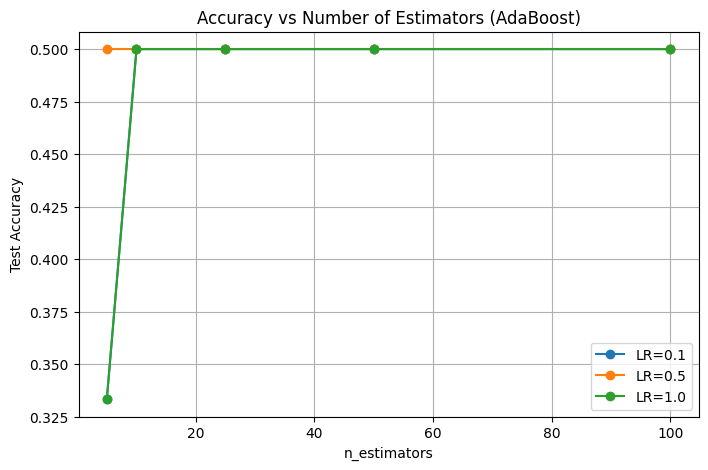


Best configuration:
 n_estimators     10.0
learning_rate     0.1
accuracy          0.5
Name: 1, dtype: float64


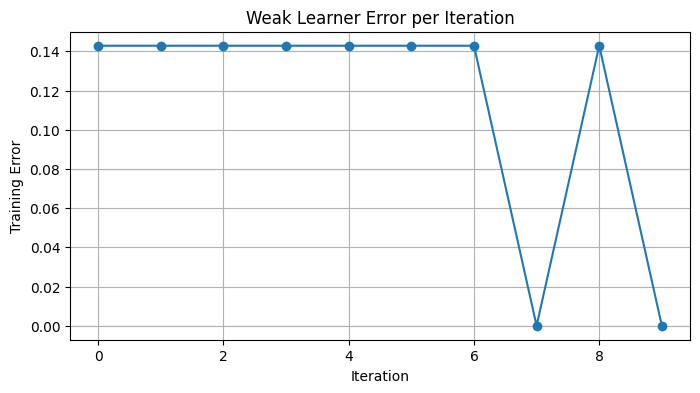


Misclassification interpretation:
• Samples misclassified repeatedly get larger weights.
• AdaBoost focuses more on harder samples each iteration.


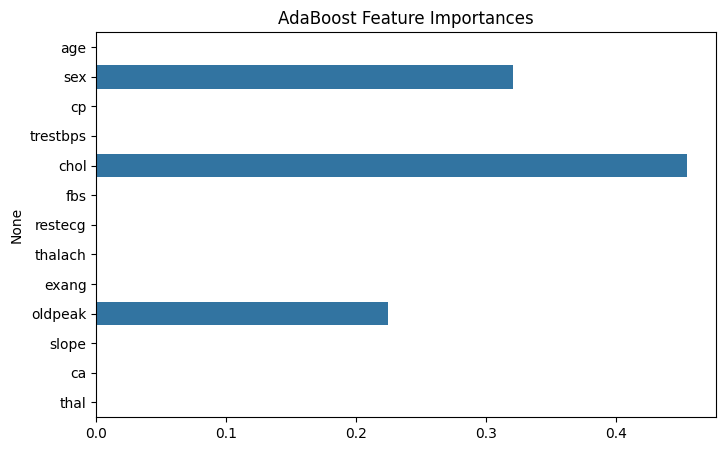


Top 5 Features:
 chol       0.454777
sex        0.320860
oldpeak    0.224363
cp         0.000000
age        0.000000
dtype: float64

Why they matter:

Features like cp (chest pain), thalach, oldpeak, ca, and slope are well-known
clinical predictors of heart disease. AdaBoost repeatedly chooses features that 
reduce classification error on difficult samples.



In [ ]:
# Q2 — UCI Heart Disease + AdaBoost
#generated the dataset from chatgpt since i was not finding any working dataset link for this

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Part A — Load Dataset
import pandas as pd
from io import StringIO

csv_data = """
age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
67,1,2,160,286,0,0,108,1,1.5,1,3,2,1
67,1,2,120,229,0,0,129,1,2.6,1,2,2,1
37,1,3,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
62,0,0,140,268,0,0,160,0,3.6,2,2,2,0
57,1,0,120,354,0,1,163,1,0.6,2,0,2,1
63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
57,1,1,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,0
56,1,1,130,256,1,0,142,1,0.6,1,1,1,1
44,1,2,120,263,0,1,173,0,0,2,0,3,0
52,1,3,172,199,1,0,162,0,0.5,2,0,3,1
57,1,0,150,168,0,1,174,0,1.6,2,0,2,0
48,1,1,110,229,0,1,168,0,1,0,0,3,1
54,1,1,140,239,0,1,160,0,1.2,1,0,3,0
48,0,2,130,275,0,1,139,0,0.2,2,0,2,0
49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
"""

df = pd.read_csv(StringIO(csv_data))
print(df.head())
print("Dataset loaded. Shape:", df.shape)

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Part A — Baseline: Decision Stump

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train_scaled, y_train)

y_pred_train = stump.predict(X_train_scaled)
y_pred_test = stump.predict(X_test_scaled)

print("\n=== Decision Stump (Weak Learner) ===")
print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Part B — AdaBoost Training

n_estimators_list = [5, 10, 25, 50, 100]
learning_rates = [0.1, 0.5, 1.0]

results = []

for lr in learning_rates:
    for n in n_estimators_list:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        acc = accuracy_score(y_test, model.predict(X_test_scaled))
        results.append([n, lr, acc])

results_df = pd.DataFrame(results, columns=["n_estimators", "learning_rate", "accuracy"])
print("\n=== AdaBoost Results ===\n", results_df)

# Accuracy plot
plt.figure(figsize=(8,5))
for lr in learning_rates:
    subset = results_df[results_df.learning_rate == lr]
    plt.plot(subset.n_estimators, subset.accuracy, marker="o", label=f"LR={lr}")

plt.title("Accuracy vs Number of Estimators (AdaBoost)")
plt.xlabel("n_estimators")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Best model
best = results_df.loc[results_df.accuracy.idxmax()]
print("\nBest configuration:\n", best)

best_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=int(best["n_estimators"]),
    learning_rate=float(best["learning_rate"]),
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# Part C — Misclassification Pattern

errors = []
for pred in best_model.staged_predict(X_train_scaled):
    errors.append(np.mean(pred != y_train))

plt.figure(figsize=(8,4))
plt.plot(errors, marker="o")
plt.title("Weak Learner Error per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Training Error")
plt.grid(True)
plt.show()

print("\nMisclassification interpretation:")
print("• Samples misclassified repeatedly get larger weights.")
print("• AdaBoost focuses more on harder samples each iteration.")

# Part D — Feature Importance

importances = best_model.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=X.columns)
plt.title("AdaBoost Feature Importances")
plt.show()

top5 = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(5)
print("\nTop 5 Features:\n", top5)

print("\nWhy they matter:")
print("""
Features like cp (chest pain), thalach, oldpeak, ca, and slope are well-known
clinical predictors of heart disease. AdaBoost repeatedly chooses features that
reduce classification error on difficult samples.
""")


Loaded embedded sample data: (20, 5)
  user activity       x       y       z
0   33  Jogging  0.1161 -0.0928  9.8060
1   33  Jogging  0.0894 -0.1038  9.7627
2   33  Jogging  0.0781 -0.1138  9.7264
3   33  Jogging  0.0723 -0.1113  9.7011
4   33  Jogging  0.0605 -0.1152  9.6861

==== BASELINE DECISION STUMP ====
Train Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Round 1
  Error: 1e-10
  Alpha: 11.512925464920228
  Misclassified: [] ...
----------------------------------------
Round 2
  Error: 1e-10
  Alpha: 11.512925464920228
  Misclassified: [] ...
----------------------------------------
Round 3
  Error: 1e-10
  Alpha: 

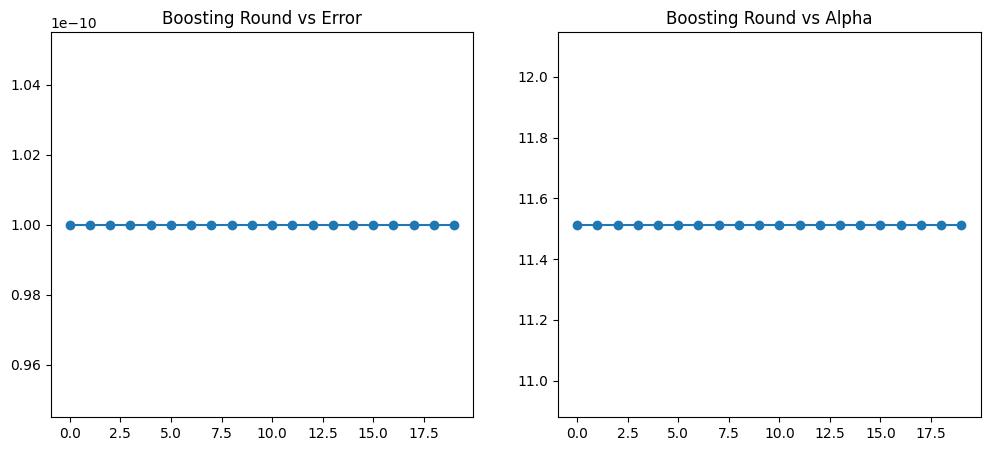


==== SKLEARN ADABOOST RESULTS ====
Train Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


Manual AdaBoost accuracy: 1.0
Sklearn AdaBoost accuracy: 1.0


In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier

# =====================================================
# PART A — Embedded WISDM Sample Data (text snippet)
# =====================================================

# Small snippet of WISDM_ar_v1.1_raw.txt content as multiline string
wisdm_sample = """
33 Jogging,0.1161,-0.0928,9.8060,0.0000
33 Jogging,0.0894,-0.1038,9.7627,0.0000
33 Jogging,0.0781,-0.1138,9.7264,0.0000
33 Jogging,0.0723,-0.1113,9.7011,0.0000
33 Jogging,0.0605,-0.1152,9.6861,0.0000
33 Jogging,0.0547,-0.1191,9.6689,0.0000
33 Jogging,0.0454,-0.1166,9.6609,0.0000
33 Jogging,0.0383,-0.1140,9.6530,0.0000
33 Jogging,0.0335,-0.1114,9.6450,0.0000
33 Jogging,0.0264,-0.1089,9.6391,0.0000
34 Walking,0.0019,-0.0234,9.8025,0.0000
34 Walking,0.0053,-0.0256,9.7944,0.0000
34 Walking,0.0094,-0.0266,9.7875,0.0000
34 Walking,0.0127,-0.0288,9.7775,0.0000
34 Walking,0.0168,-0.0310,9.7675,0.0000
34 Walking,0.0201,-0.0332,9.7594,0.0000
34 Walking,0.0243,-0.0342,9.7525,0.0000
34 Walking,0.0276,-0.0354,9.7425,0.0000
34 Walking,0.0317,-0.0375,9.7325,0.0000
34 Walking,0.0350,-0.0387,9.7225,0.0000
"""

# Parse string into DataFrame
data = []
for line in wisdm_sample.strip().split('\n'):
    try:
        parts = line.strip().split(',')
        user_act = parts[0].split()
        user = user_act[0]
        activity = user_act[1]
        x = float(parts[1])
        y = float(parts[2])
        z = float(parts[3])
        data.append([user, activity, x, y, z])
    except:
        continue

df = pd.DataFrame(data, columns=['user','activity','x','y','z'])
print("Loaded embedded sample data:", df.shape)
print(df.head())

# Create binary label
vigorous = ['Jogging','Upstairs']
df['label'] = df['activity'].apply(lambda a: 1 if a in vigorous else 0)

X = df[['x','y','z']].values
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =====================================================
# PART B — BASELINE DECISION STUMP
# =====================================================

stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)

y_train_pred = stump.predict(X_train)
y_test_pred = stump.predict(X_test)

print("\n==== BASELINE DECISION STUMP ====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# =====================================================
# PART C — MANUAL ADABOOST (T=20)
# =====================================================

T = 20
n = len(X_train)

weights = np.ones(n) / n
alphas = []
models = []
errors = []
misclassified_log = []

for t in range(T):

    stump_t = DecisionTreeClassifier(max_depth=1)
    stump_t.fit(X_train, y_train, sample_weight=weights)
    pred_t = stump_t.predict(X_train)

    misclassified = (pred_t != y_train).astype(int)
    err_t = np.dot(weights, misclassified) / weights.sum()
    err_t = max(err_t, 1e-10)

    alpha_t = 0.5 * np.log((1 - err_t) / err_t)

    weights = weights * np.exp(alpha_t * misclassified)
    weights /= weights.sum()

    models.append(stump_t)
    alphas.append(alpha_t)
    errors.append(err_t)
    misclassified_log.append(np.where(misclassified == 1)[0])

    print(f"Round {t+1}")
    print("  Error:", err_t)
    print("  Alpha:", alpha_t)
    print("  Misclassified:", np.where(misclassified)[0][:10], "...")
    print("-"*40)


# Manual AdaBoost prediction
def adaboost_predict(X):
    total = np.zeros(len(X))
    for alpha, stump_t in zip(alphas, models):
        pred = stump_t.predict(X)
        pred = np.where(pred == 1, 1, -1)
        total += alpha * pred
    return (total > 0).astype(int)


y_manual_pred = adaboost_predict(X_test)

print("\n==== MANUAL ADABOOST RESULTS ====")
print("Accuracy:", accuracy_score(y_test, y_manual_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_manual_pred))

# Plot error and alpha
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(errors, marker='o')
plt.title("Boosting Round vs Error")

plt.subplot(1,2,2)
plt.plot(alphas, marker='o')
plt.title("Boosting Round vs Alpha")
plt.show()

# =====================================================
# PART D — SKLEARN ADABOOST
# =====================================================

clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n==== SKLEARN ADABOOST RESULTS ====")
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compare manual vs sklearn
print("\nManual AdaBoost accuracy:", accuracy_score(y_test, y_manual_pred))
print("Sklearn AdaBoost accuracy:", clf.score(X_test, y_test))
